In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_df = pd.read_csv("kc_house_data.csv")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
house_df["is_basement"] = house_df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Distribution of Prices

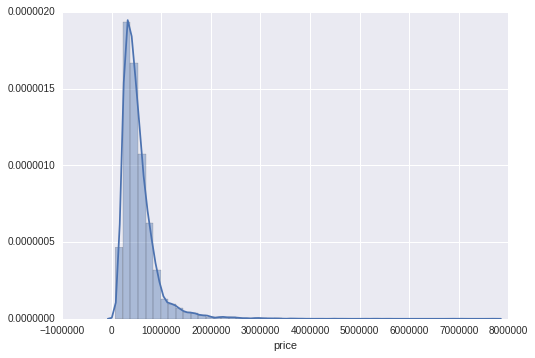

In [5]:
# histogram of prices
sns.distplot(house_df["price"])

# Price vs Bedrooms
To find the relation between number of bedrooms in houses and price of those houses : 

In [6]:
# average price for no. of bedrooms in house
grpby_bedrooms_df = house_df[["price", "bedrooms"]].groupby(by = "bedrooms", as_index = False)
grpby_bedrooms_df = grpby_bedrooms_df.mean()
grpby_bedrooms_df.head()

,bedrooms,price
0,0,409503.846154
1,1,317642.884422
2,2,401372.681884
3,3,466232.078481
4,4,635419.504214


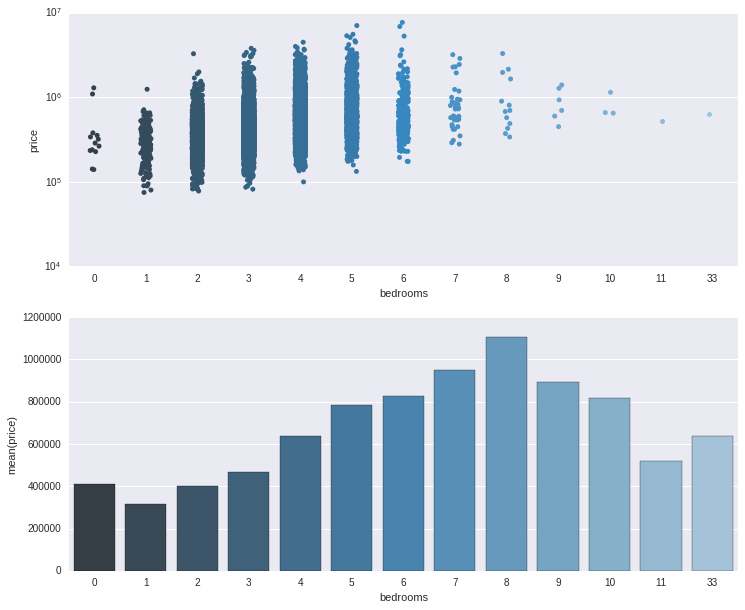

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = house_df, ax = ax1, jitter=True, palette="Blues_d")
sns.barplot(x = "bedrooms", y = "price", data = grpby_bedrooms_df, ax = ax2, palette="Blues_d")

# Sqft vs Price
There are six squre feet measures given in the dataset:
1. sqft_living
2. sqft_living15
3. sqft_lot
4. sqft_lot15
5. sqft_above
6. sqft_basement


* out of these six measures "sqft_lot", "sqft_lot15" and "sqft_basement" have very low correlation with price.
* interestingly size of basement is not very much affect price but presence of basement affect price. Houses with basement tends to have higher price than houses without basement.

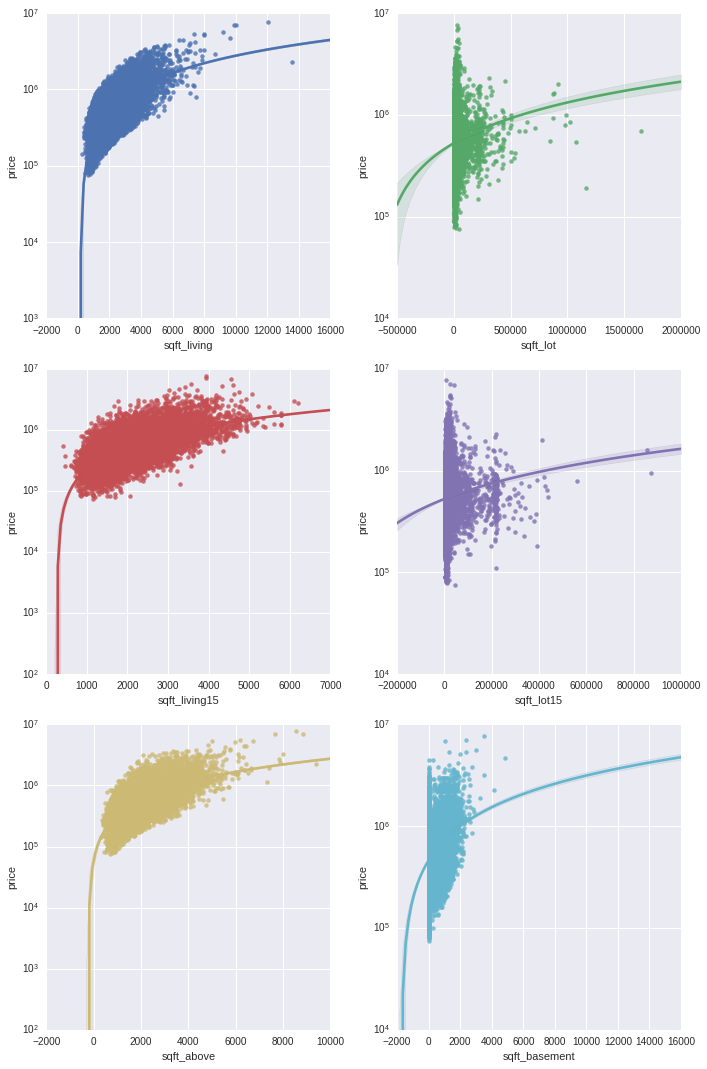

In [8]:
sqft = ["sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15", "sqft_above", "sqft_basement"]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (10, 15))
ax1.set(yscale = "log")
ax2.set(yscale = "log")
ax3.set(yscale = "log")
ax4.set(yscale = "log")
ax5.set(yscale = "log")
ax6.set(yscale = "log")

sns.regplot(x = sqft[0], y = "price", data = house_df, ax = ax1)
sns.regplot(x = sqft[1], y = "price", data = house_df, ax = ax2)
sns.regplot(x = sqft[2], y = "price", data = house_df, ax = ax3)
sns.regplot(x = sqft[3], y = "price", data = house_df, ax = ax4)
sns.regplot(x = sqft[4], y = "price", data = house_df, ax = ax5)
sns.regplot(x = sqft[5], y = "price", data = house_df, ax = ax6)

fig.tight_layout()
# sns.pairplot(house_df, y_vars = sqft, x_vars = ["price"], size = 5, kind = "reg")

In [9]:
grpby_is_basement_df = house_df[["is_basement", "price"]].groupby(by = "is_basement", 
                                                               as_index = False)
grpby_is_basement_df = grpby_is_basement_df.mean()

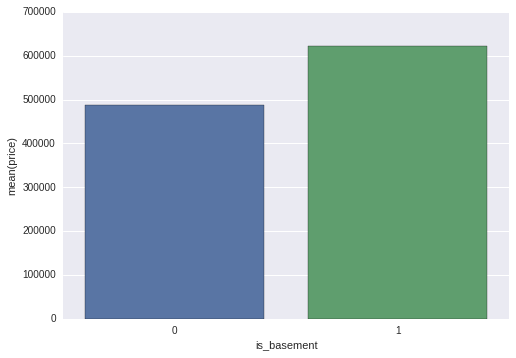

In [10]:
sns.barplot(x = "is_basement", y = "price", data = grpby_is_basement_df)

# Correlation btw Variables

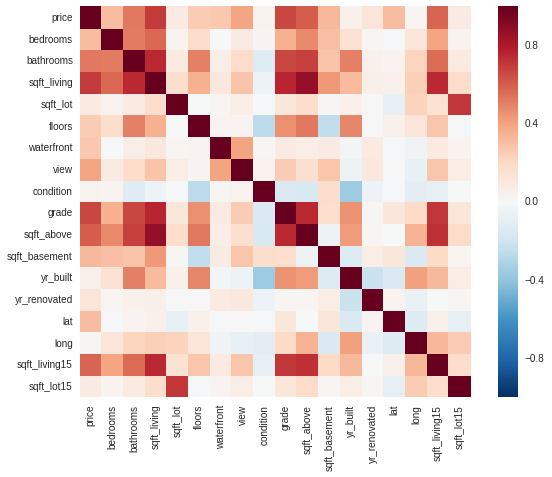

In [11]:
cols = house_df.columns.values.tolist()
cols.remove("id")
cols.remove("is_basement")
cols.remove("zipcode")

corrmat = house_df[cols].corr()

f, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(corrmat, square = True)